In [1]:
from multicorner import mcorner
import corner as corner
import numpy as np

## A Short Test

Let's start by generating a multivariate distribution with random covariances. We'll assume these two distributions are widely spaced with few points in-between them

In [2]:
np.random.seed(42)

# Generate random covariance matrices with sigmas ~ 1
def random_covariance():
    A = np.random.rand(3, 3)
    cov = np.dot(A, A.T)  # Ensure it's positive semi-definite
    return cov 

In [3]:
mean1 = np.array([0,5,10])  # Random center
cov1 = random_covariance()

shift = 100
mean2 = mean1 + shift
cov2 = random_covariance()

# Generate data
data1 = np.random.multivariate_normal(mean1, cov1, 5000)
data2 = np.random.multivariate_normal(mean2, cov2, 1000)
data = np.vstack((data1, data2))

## Approach 1: Using Corner

Using Corner.py in this case produces a corner plot, but without much detail. The individual distributions cannot be seen due to their separation. 

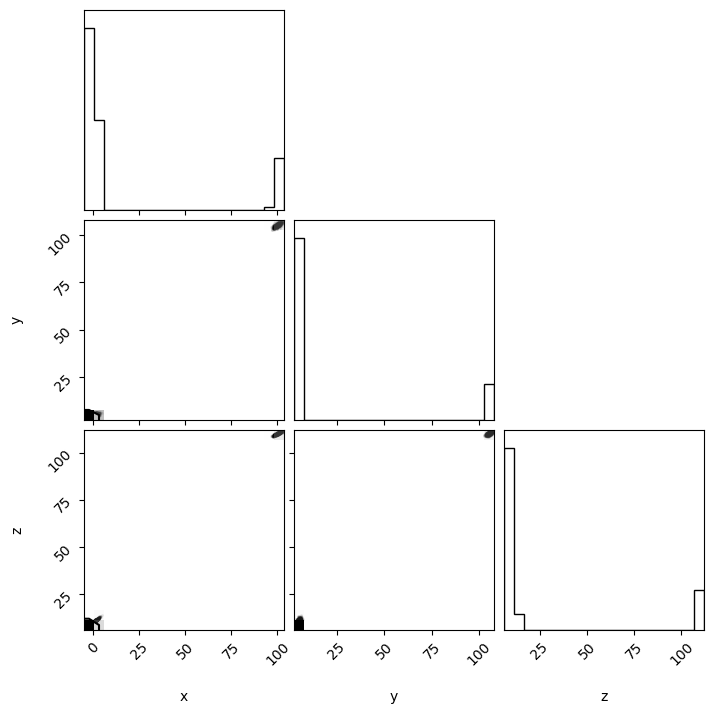

In [4]:
fig = corner.corner(data,labels=['x','y','z'])
fig.savefig("cornerplot.png")

## Approach 1: Using MultiCorner

Instead if we use MultiCorner, the distributions are automatically separated and stored in a grid.  The resulting array has 3 main components.

### 1. The lower triangle

Much like a traditional corner plot, the lower triangle gives us information about each distribution as a grid of subplots. These are equivalent to a corner-plot for each of the individual 'modes' that make up the dataset. 

### 2. The Diagonal

The diagonal shows histograms of each individual 'mode' in the dataset - Just like a traditional corner-plot


### 3. The upper triangle

The upper triangle shows the relative positions of each 'mode' in the dataset.  It shows the large-scale distribution of data, while the diagonal and lower triangle show the small scale details. 



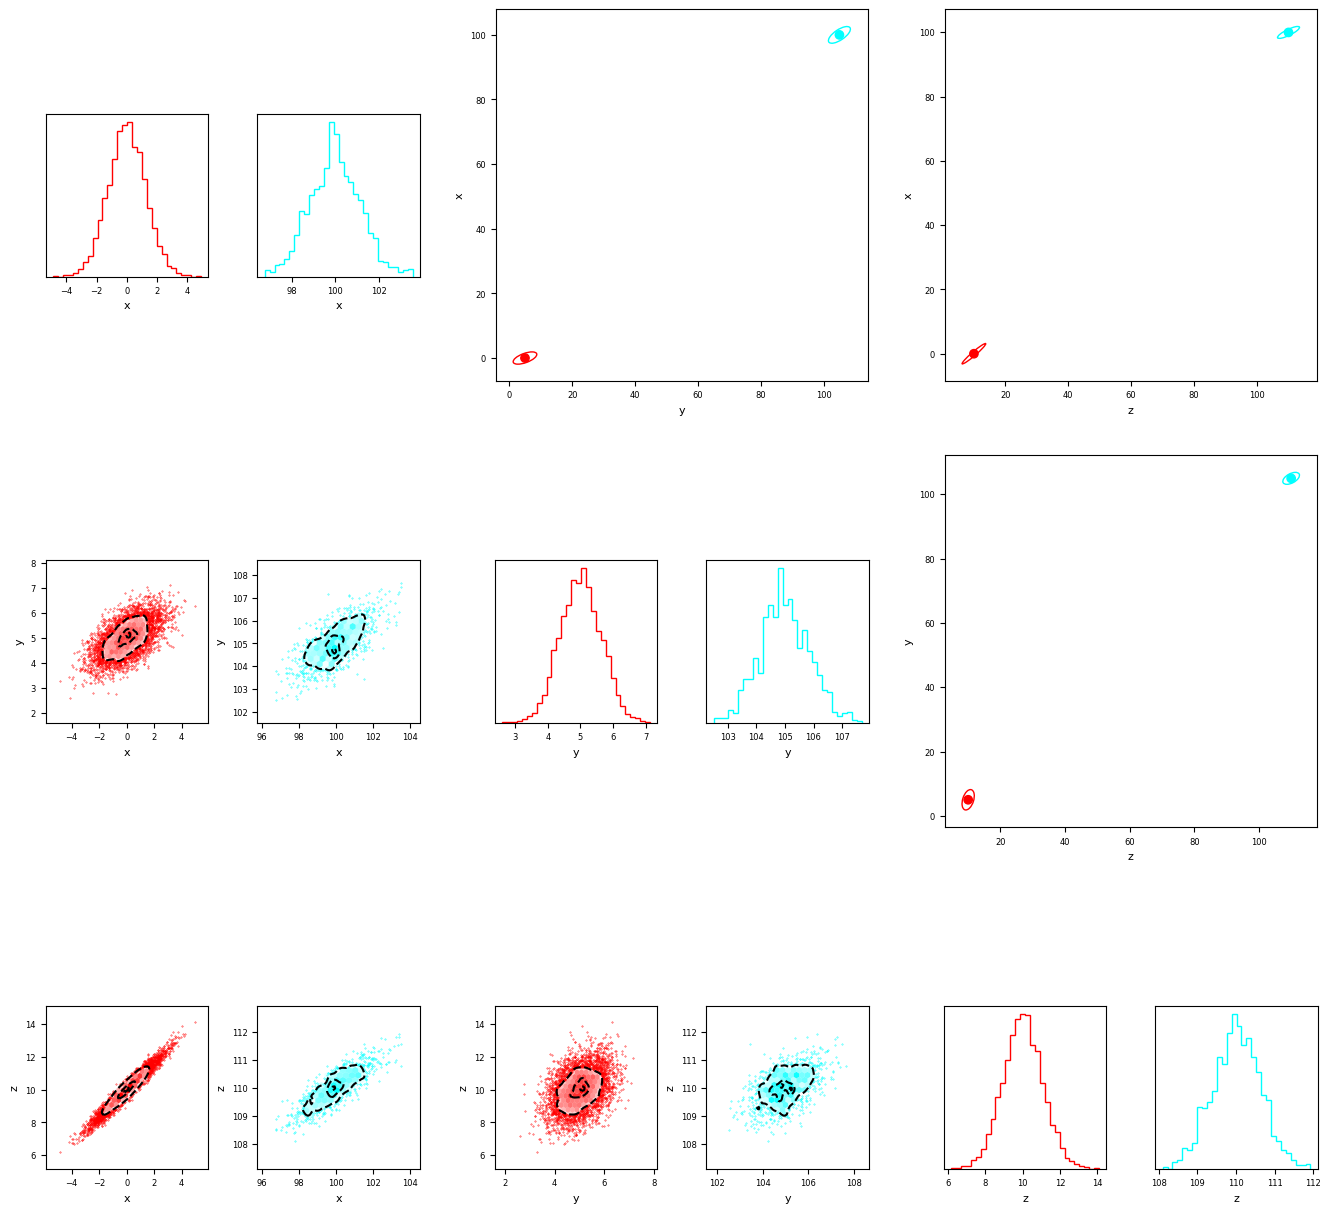

In [5]:
fig = mcorner(data,labels=['x','y','z'],confidence_ellipse=True,nsigma=3)

we can also draw percentile bounds by simply raising a flag when we call multivariate_corner

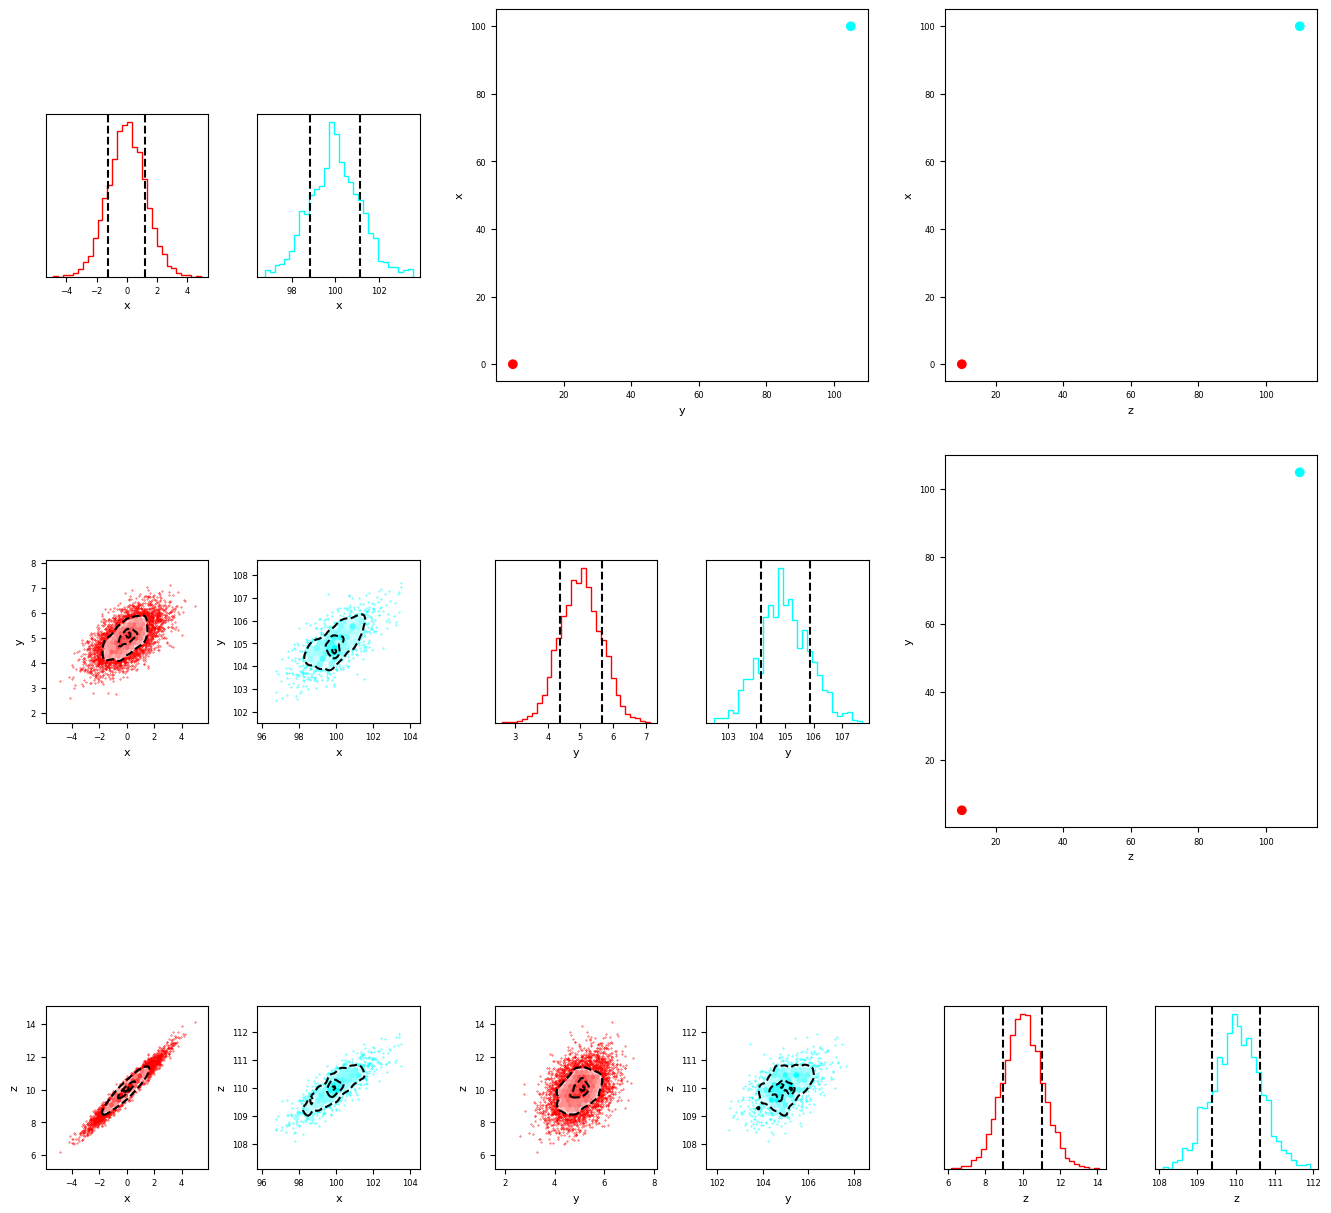

In [6]:
fig = mcorner(data,labels=['x','y','z'],percentiles=True)

By default, thesea are at the 16th and 84th percentiels. However we can also pass custom bounds to plot whichever we like. Below is an example near the 2 sigma bounds (approximately 3rd and 97th percentiles).

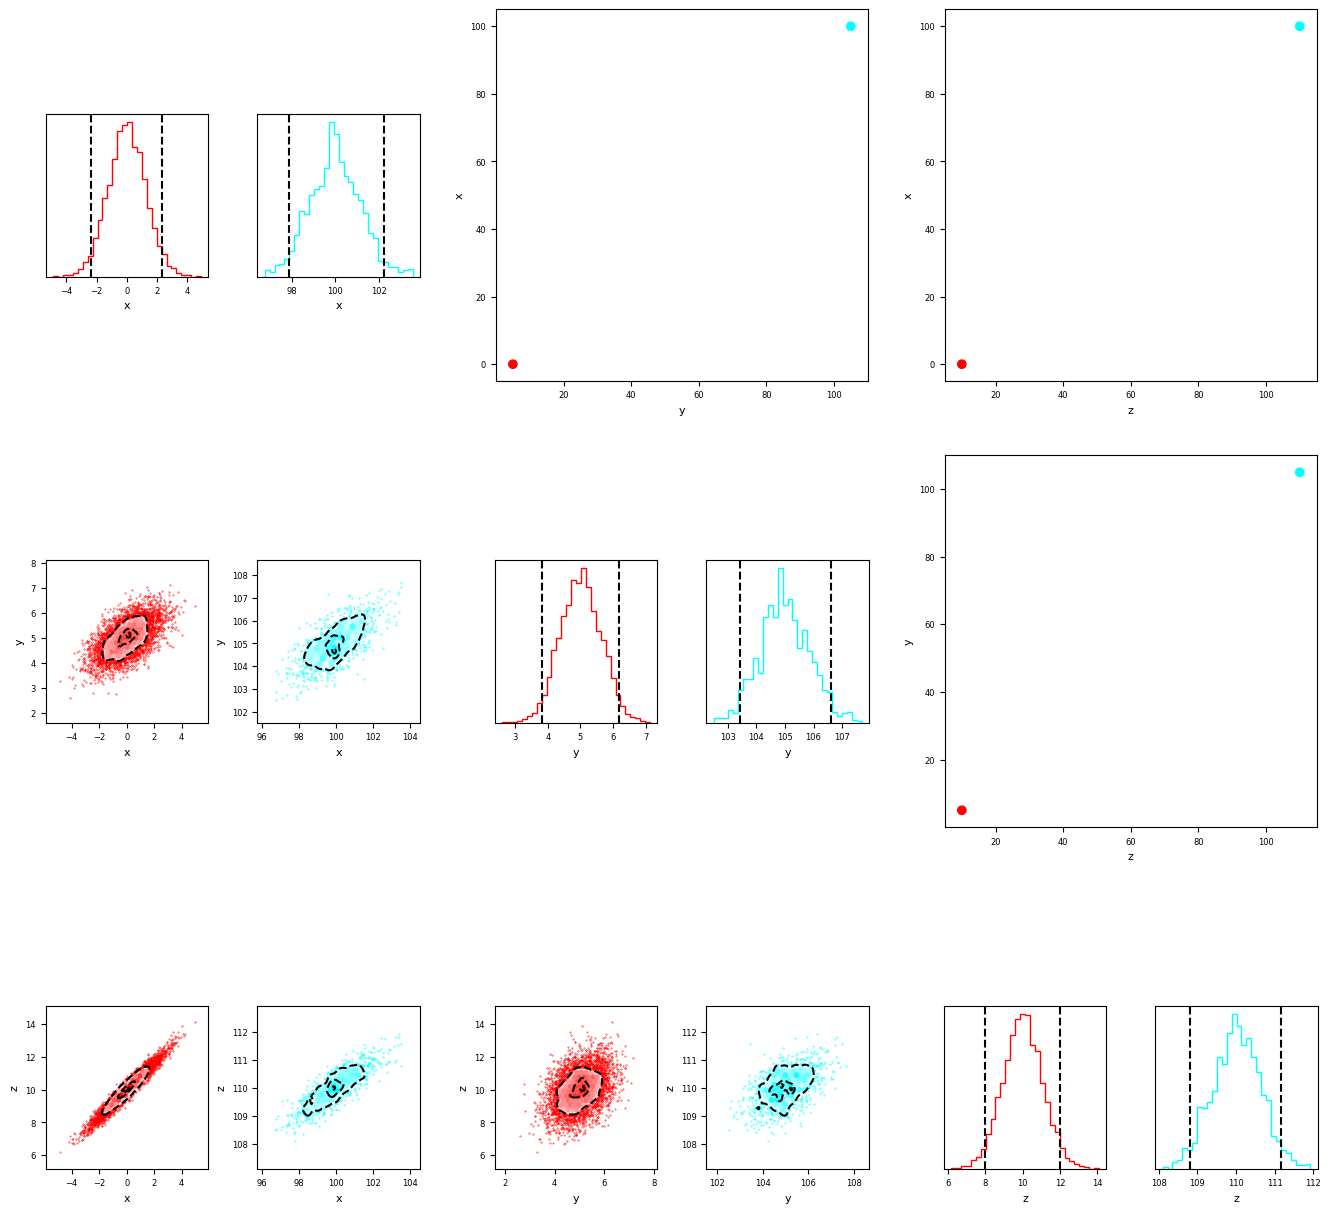

In [7]:
fig = mcorner(data,labels=['x','y','z'],percentiles=True,percentile_bounds=[3,97])

We can also plot the true values on the plot. Note that the 'truths' won't be shown in all subplots in the lower triangle or diagona, as the individual histograms set the axis limits in those plots. The orientation of the true value, compared with the minima, can be seen in the upper-triangle orientation plots.

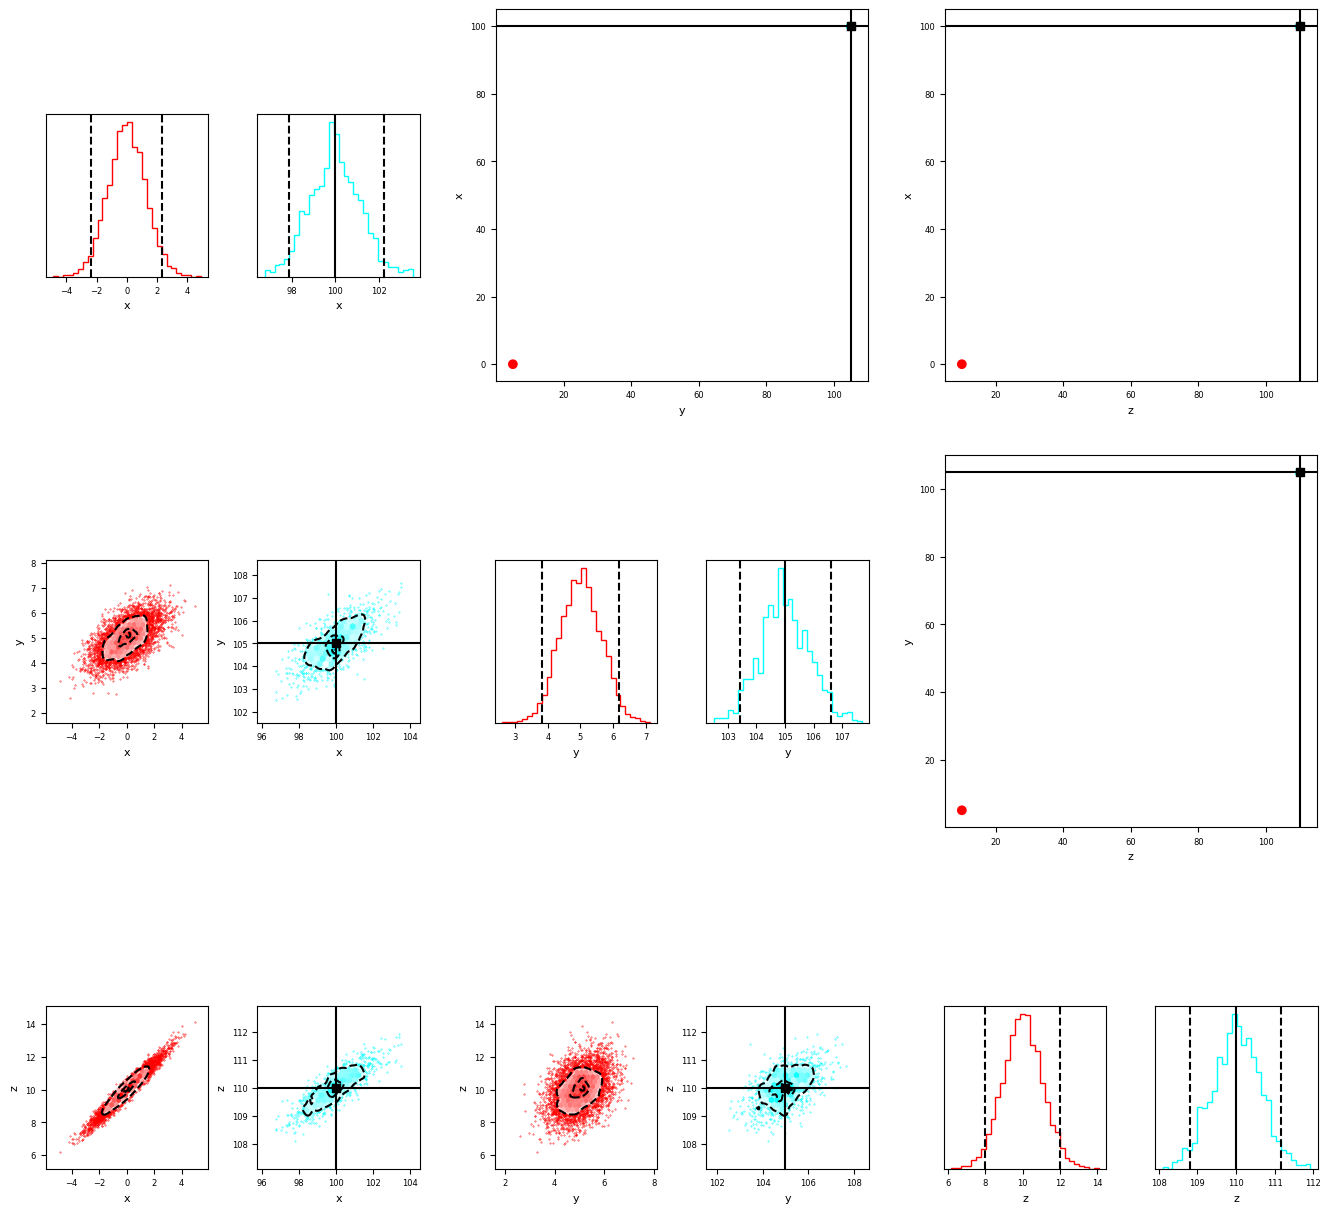

In [8]:
fig = mcorner(data,labels=['x','y','z'],percentiles=True,percentile_bounds=[3,97],truths=[100,105,110])

Finally we can add illustrative covariance contours to get an idea of the relative orientation of the plots and reproduce the graphic from the paper!

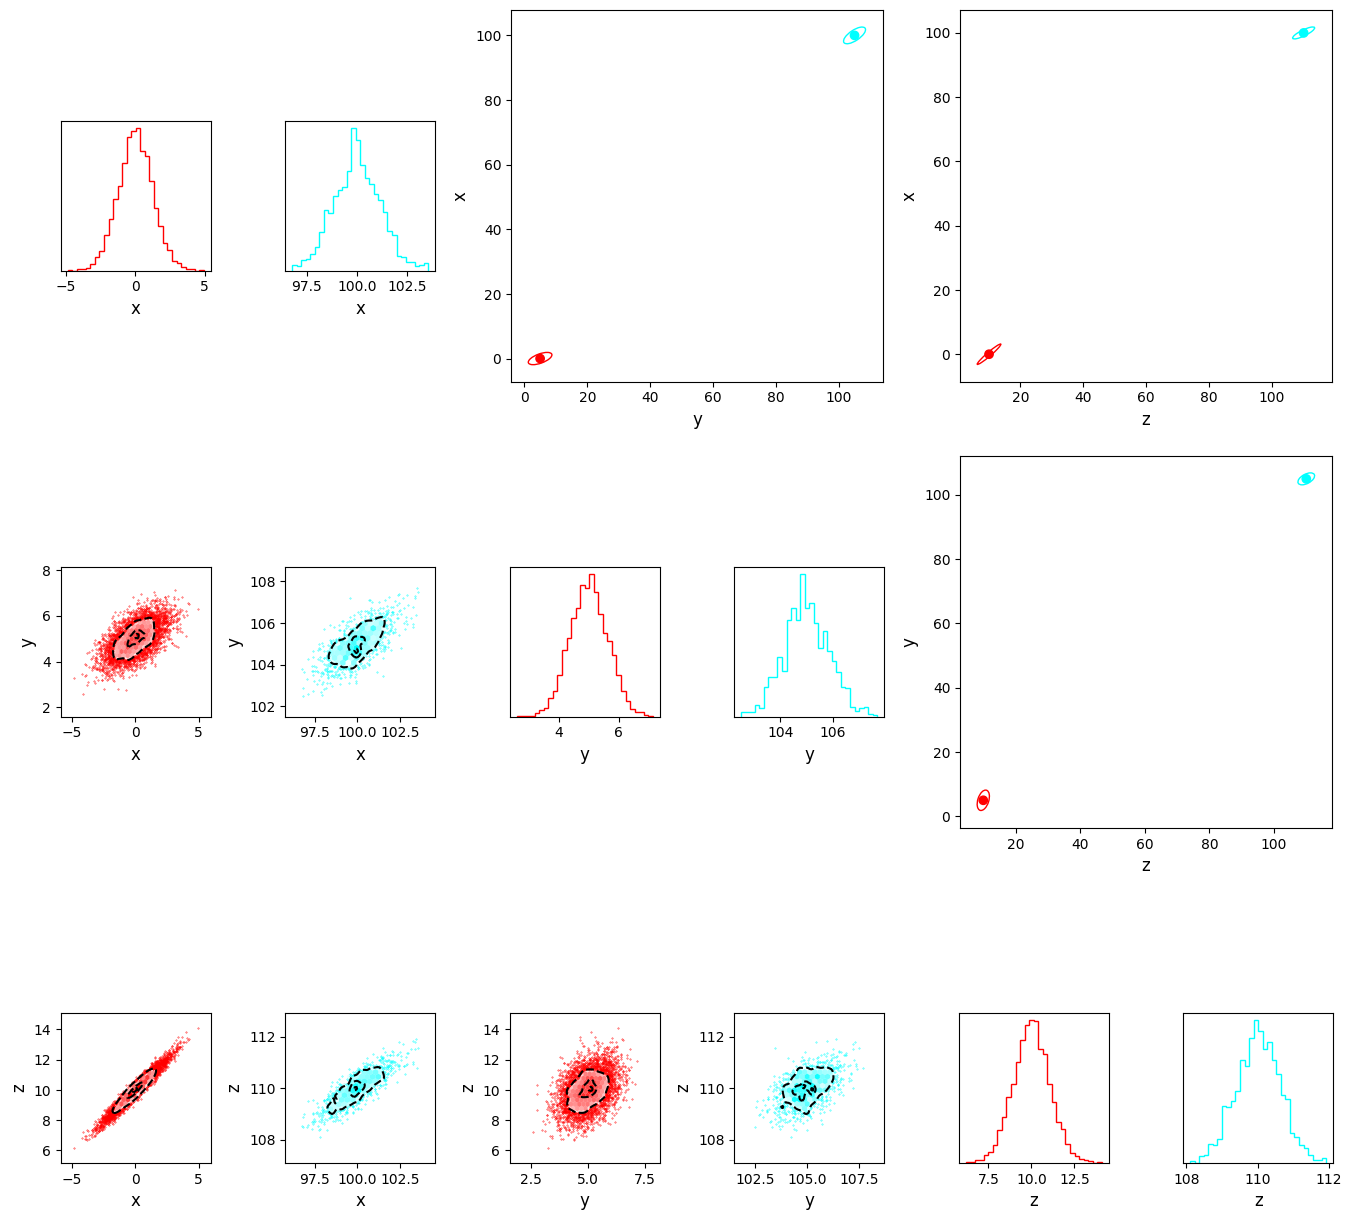

In [11]:
fig = mcorner(data,labels=['x','y','z'],confidence_ellipse=True,nsigma=3,ticksize=10,labelsize=12,inner_wspace=0.5)
fig.savefig("multicornerplot.png")